# SPACEc:Distance permutation analysis

## Set up environment

In [129]:
import spacec as sp

#import standard packages
import pathlib
import pandas as pd
import scanpy as sc

# silencing warnings
import warnings
warnings.filterwarnings('ignore')

In [100]:
# set plotting parameters
sc.settings.set_figure_params(dpi=80, facecolor='white')

In [101]:
root_path = pathlib.Path("/home/tim/Dokumente/SPACEc_Apr_2024/")

data_path = root_path / 'data/' # where the data is stored

# where you want to store the output
output_dir = root_path / '_outs'
output_dir.mkdir(exist_ok=True, parents=True)

In [16]:
# Load data
adata = sc.read(output_dir / "adata_nn_demo_annotated_cn.h5ad")
adata

AnnData object with n_obs × n_vars = 46789 × 59
    obs: 'DAPI', 'x', 'y', 'area', 'region_num', 'unique_region', 'condition', 'leiden_1', 'leiden_1_subcluster', 'cell_type_coarse', 'cell_type_coarse_subcluster', 'cell_type_coarse_f', 'cell_type_coarse_f_subcluster', 'cell_type_coarse_f_f', 'cell_type', 'CN_k20_n40', 'CN_k20_n30', 'CN_k20_n20', 'CN_k20_n25', 'CN_k20_n6', 'CN_k20_n6_annot'
    uns: 'CN_k20_n6_colors', 'Centroid_k20_n20', 'Centroid_k20_n25', 'Centroid_k20_n30', 'Centroid_k20_n40', 'Centroid_k20_n6', 'cell_type_coarse_f_colors', 'cell_type_colors', 'dendrogram_cell_type_coarse_f_subcluster', 'leiden', 'leiden_1_colors', 'neighbors', 'umap', 'unique_region_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'scaled'
    obsp: 'connectivities', 'distances'

## Identify potential interactions

In [20]:
distance_pvals = sp.tl.identify_interactions(
    adata = adata, # AnnData object
    cellid = "index", # column that contains the cell id (set index if the cell id is the index of the dataframe)
    x_pos = "x", # x coordinate column
    y_pos = "y", # y coordinate column
    cell_type = "cell_type", # column that contains the cell type information
    region = "unique_region", # column that contains the region information
    num_iterations=1000, # number of iterations for the permutation test
    num_cores=10,  # number of CPU threads to use
    min_observed = 10, # minimum number of observed interactions to consider a cell type pair
    comparison = 'condition', # column that contains the condition information we want to compare
    distance_threshold=20/0.5085) # distance threshold in px (20 µm)


index is not in the adata.obs, use index as cellid instead!
Computing for observed distances between cell types!
This function expects integer values for xy coordinates.
x and y will be changed to integer. Please check the generated output!


INFO:root: * TissUUmaps version: 3.1.1.6
INFO:root: * TissUUmaps version: 3.1.1.6


Save triangulation distances output to anndata.uns triDist
Permuting data labels to obtain the randomly distributed distances!
this step can take awhile


INFO:root: * TissUUmaps version: 3.1.1.6
INFO:root: * TissUUmaps version: 3.1.1.6
INFO:root: * TissUUmaps version: 3.1.1.6
INFO:root: * TissUUmaps version: 3.1.1.6
INFO:root: * TissUUmaps version: 3.1.1.6
INFO:root: * TissUUmaps version: 3.1.1.6
INFO:root: * TissUUmaps version: 3.1.1.6
INFO:root: * TissUUmaps version: 3.1.1.6


Save iterative triangulation distance output to anndata.uns triDist


In [21]:
adata.uns['triDist']

,celltype1,celltype2,mean_dist,unique_region,iteration,condition
0,B cell,B cell,17.322904,reg002,1,tonsillitis
1,B cell,CD4+ T cell,18.485693,reg002,1,tonsillitis
2,B cell,CD8+ T cell,17.229160,reg002,1,tonsillitis
3,B cell,DC,17.252697,reg002,1,tonsillitis
4,B cell,Epithelial cell,17.441963,reg002,1,tonsillitis
...,...,...,...,...,...,...
482696,cDC1,Neutrophil,14.764823,reg001,1000,tonsil
482697,cDC1,Plasma cell,17.054808,reg001,1000,tonsil
482698,cDC1,Treg,16.820961,reg001,1000,tonsil
482699,cDC1,Vessel,16.668742,reg001,1000,tonsil


In [22]:
# save adata
adata.write(output_dir / "adata_nn_demo_annotated_cn.h5ad")

In [83]:
# Identify significant cell-cell interactions
# dist_table_filt is a simplified table used for plotting
# dist_data_filt contains the filtered raw data with more information about the pairs
#  The function outputs two dataframes:  and dist_data_filt that contains all filtered interactions and  dist_table_filt that contains a table for all interactions that show a significant value in both tissues
dist_table_filt, dist_data_filt = sp.tl.filter_interactions(
    distance_pvals = distance_pvals,
    pvalue = 0.05,
    logfold_group_abs = 0.1,
    comparison = 'condition')

print(dist_table_filt.shape)
dist_data_filt

(39, 2)


,celltype1,celltype2,condition,expected,expected_mean,keep_x,observed,observed_mean,keep_y,pvalue,logfold_group,interaction,logfold_group_abs,pairs
2,B cell,CD4+ T cell,tonsil,"[17.281922614950506, 17.270623692108778, 17.28...",17.646184,True,"[21.0, 14.7648230602334, 23.706539182259394, 2...",16.636922,True,1.317440e-46,-0.084968,B cell --> CD4+ T cell,0.084968,B cell_CD4+ T cell
3,B cell,CD4+ T cell,tonsillitis,"[18.485692875309425, 17.542156808395966, 17.41...",17.656303,True,"[28.231188426986208, 14.317821063276353, 27.29...",16.187740,True,8.446516e-67,-0.125282,B cell --> CD4+ T cell,0.125282,B cell_CD4+ T cell
8,B cell,Epithelial cell,tonsil,"[17.128317857502207, 17.472384317332953, 17.42...",17.744415,True,"[11.180339887498949, 32.0, 13.92838827718412, ...",17.731290,True,1.175790e-04,-0.001067,B cell --> Epithelial cell,0.001067,B cell_Epithelial cell
9,B cell,Epithelial cell,tonsillitis,"[17.441963049826683, 17.462752937841383, 17.41...",17.726203,True,"[32.984845004941285, 17.699649415384002, 27.99...",20.480112,True,2.999825e-08,0.208340,B cell --> Epithelial cell,0.208340,B cell_Epithelial cell
16,B cell,Mast cell,tonsil,"[17.695167954526006, 18.58880119871868, 18.557...",17.461009,True,"[15.033296378372908, 16.44427190999916, 18.357...",15.963641,True,1.669109e-03,-0.129347,B cell --> Mast cell,0.129347,B cell_Mast cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,Vessel,Neutrophil,tonsillitis,"[16.0063444598664, 18.12053492002032, 15.15022...",17.369348,True,"[22.135943621178654, 17.4928556845359, 14.1421...",18.568986,True,3.021850e-02,0.096351,Vessel --> Neutrophil,0.096351,Vessel_Neutrophil
474,Vessel,Treg,tonsil,"[17.954103317276537, 17.15715454178462, 21.619...",17.721069,True,"[15.524174696260024, 28.30194339616981, 26.076...",16.876453,True,7.598934e-06,-0.070454,Vessel --> Treg,0.070454,Vessel_Treg
475,Vessel,Treg,tonsillitis,"[17.087549869721986, 19.013220946273126, 16.84...",17.743971,True,"[26.832815729997478, 11.661903789690601, 17.20...",16.225218,True,2.884915e-10,-0.129091,Vessel --> Treg,0.129091,Vessel_Treg
506,cDC1,Treg,tonsil,"[17.032356746663876, 17.110729499765213, 16.99...",17.483293,True,"[20.024984394500787, 13.341664064126334, 18.13...",17.240494,True,4.860705e-02,-0.020176,cDC1 --> Treg,0.020176,cDC1_Treg


condition                      tonsil  tonsillitis  abs_dist
pairs                                                       
Mast cell_M1 Macrophage     -0.111741     0.306462  0.418203
CD8+ T cell_Epithelial cell -0.173932     0.148640  0.322572
Epithelial cell_CD8+ T cell -0.127416     0.107586  0.235002
B cell_Epithelial cell      -0.001067     0.208340  0.209407
M2 Macrophage_Mast cell      0.050296    -0.153881  0.204177


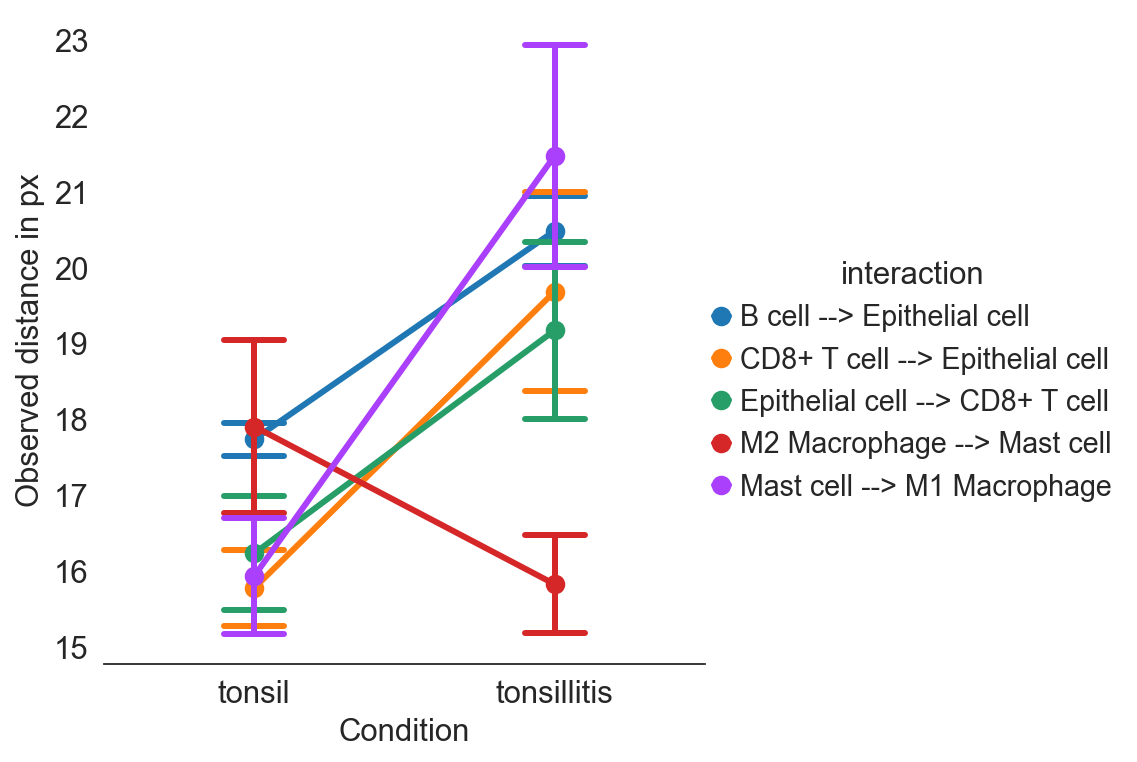

In [88]:
sp.pl.plot_top_n_distances(
    dist_table_filt,
    dist_data_filt,
    n=5,
    colors=None,
    dodge=False,
    savefig=False,
    output_fname="",
    output_dir="./",
    figsize=(5, 5),
    unit="px",
    errorbars=True,
)

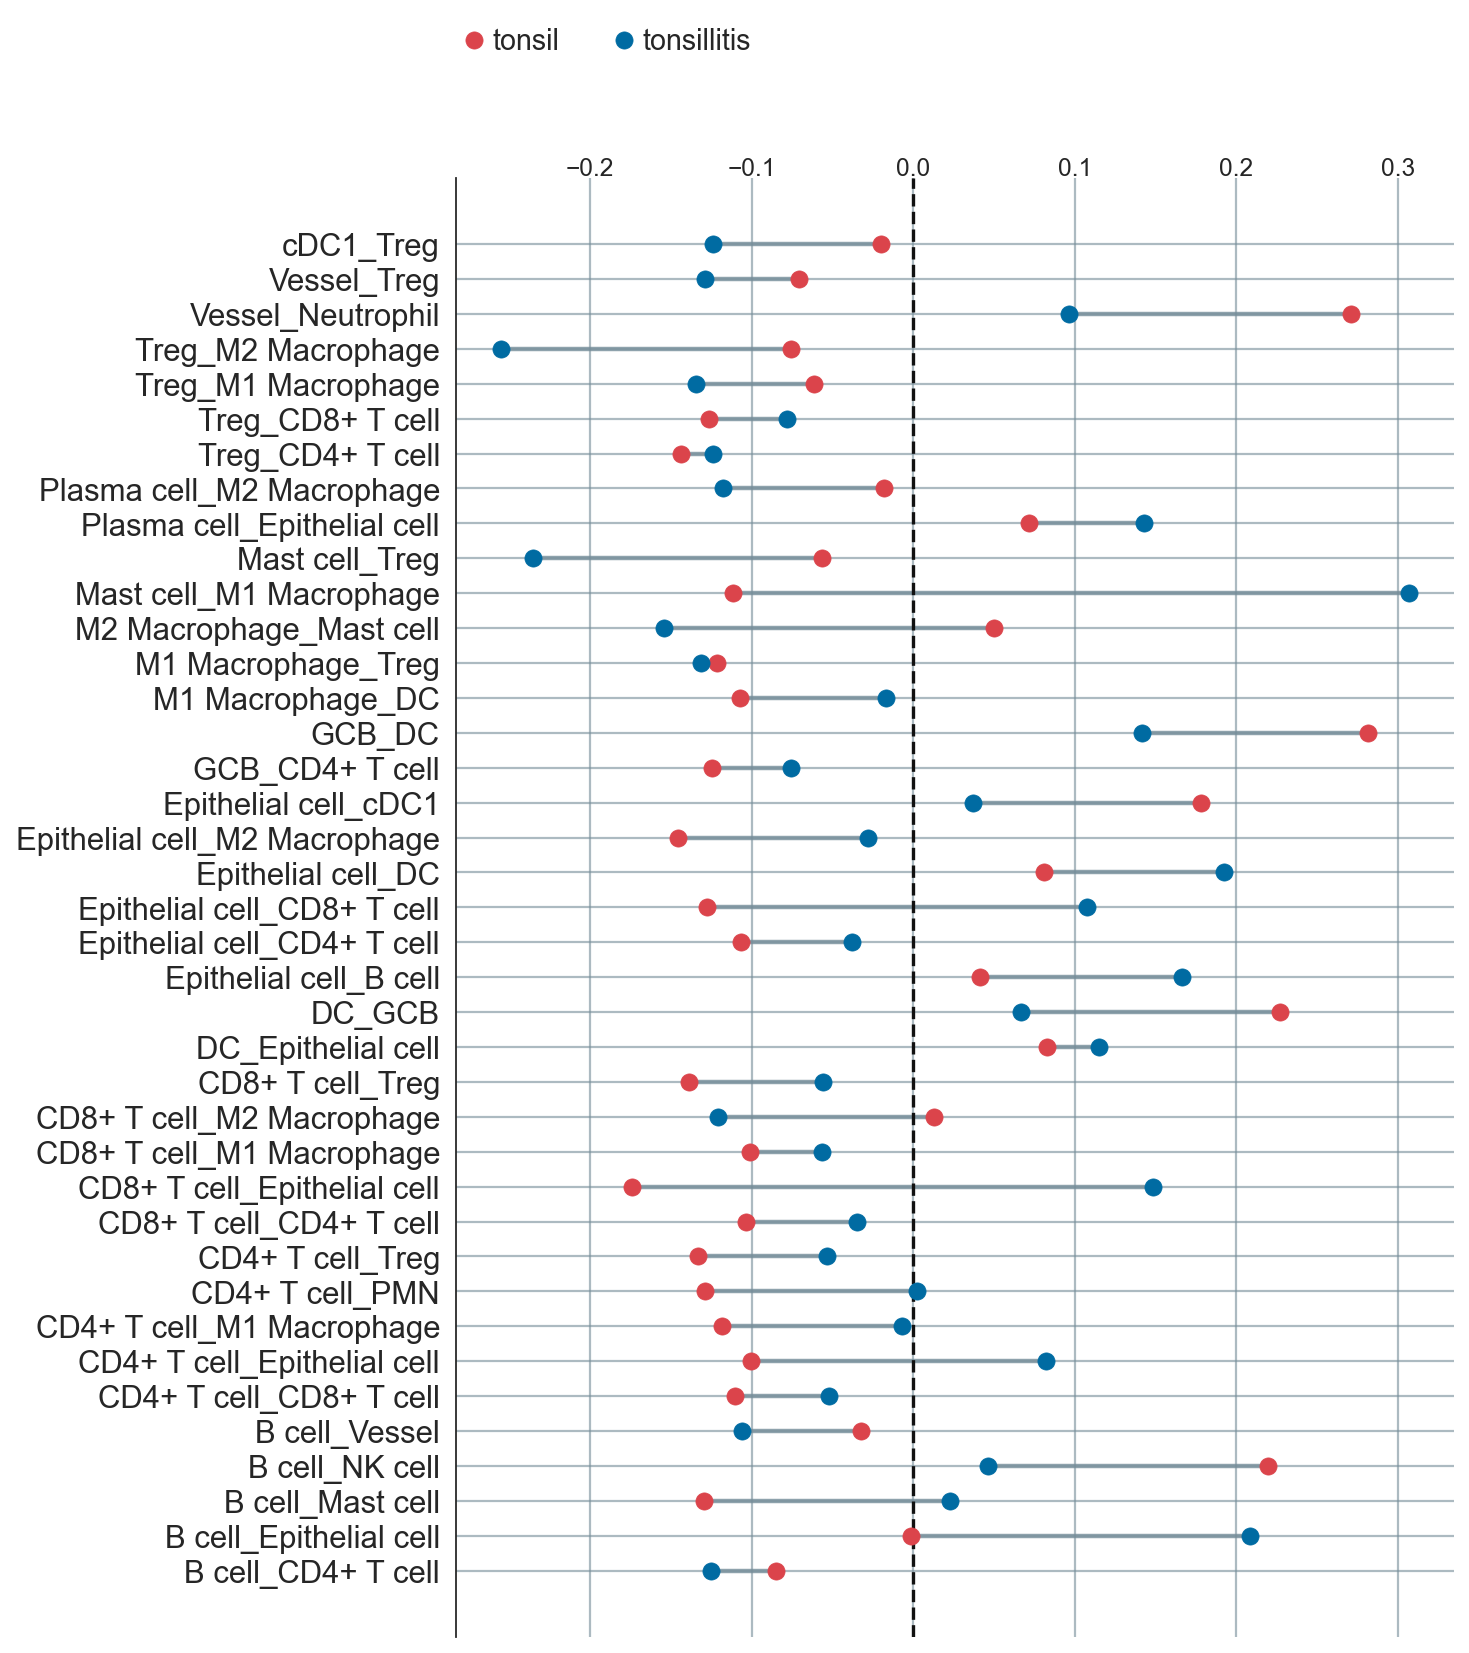

In [84]:
sp.pl.dumbbell(data = dist_table_filt, figsize=(8,12), colors = ['#DB444B', '#006BA2'])

(88, 14)


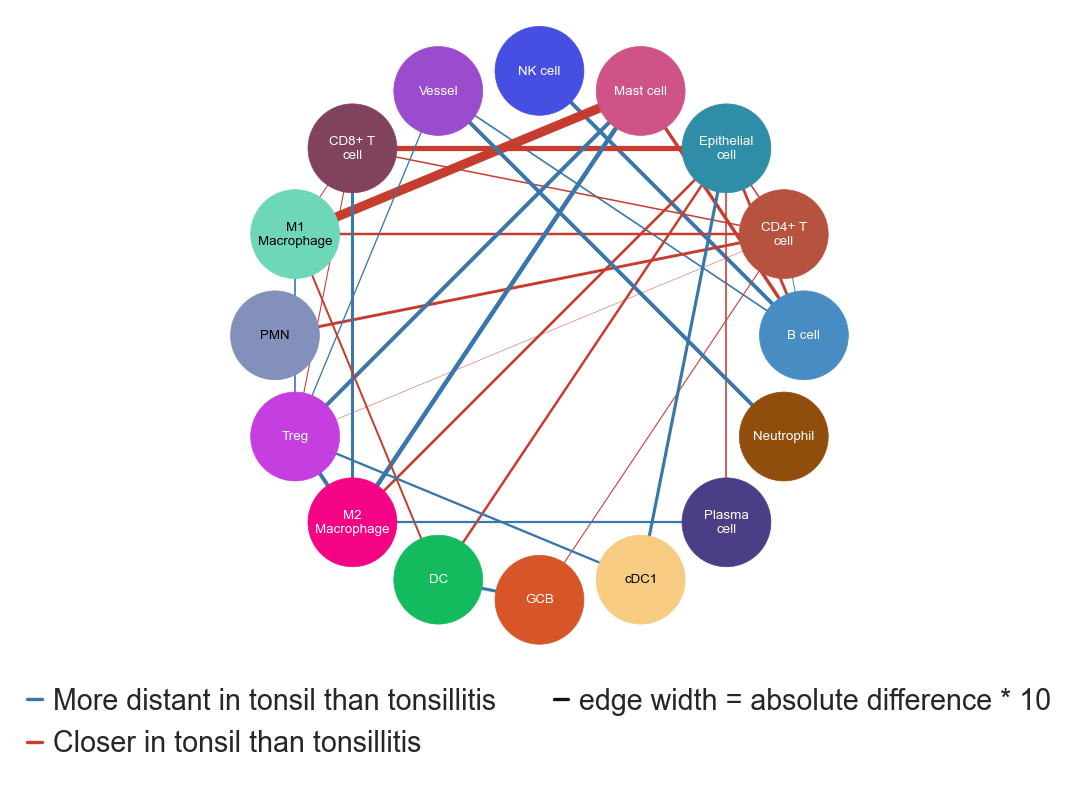

In [130]:
sp.pl.distance_graph(dist_table = dist_data_filt, # the (filtered) distance data table you want to plot 
                  distance_pvals = distance_pvals, # the full distance data table
                  condition_pair=['tonsil', 'tonsillitis'],
                  node_size=1600, font_size=6,
                  palette=None,
                  dpi = 600,
                  savefig=False,
                  output_fname="",
                  output_dir=output_dir,)